<a href="https://www.kaggle.com/code/sdysch/tps-aug-2022?scriptVersionId=102377977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
plt.style.use('seaborn')

# TODO
* Please note, this is still very much a WIP....
- [ ] Feature scaling/standardization
- [ ] More advanced imputation techniques?
- [ ] Class imbalance problem?
- [ ] Add dummy features for when NaNs are filled

# References
* https://www.kaggle.com/code/ambrosm/tpsaug22-eda-which-makes-sense/notebook

# Reading in the data

In [161]:
df_train = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/train.csv')
df_test = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/test.csv')

In [162]:
print(df_train.shape)
print(df_test.shape)

(26570, 26)
(20775, 25)


In [163]:
df_train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [164]:
df_test

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


In [165]:
df_train.isna().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [166]:
df_train = df_train.drop(['id'], axis='columns')
df_test = df_test.drop(['id'], axis='columns')

# Plot numerical columns

In [167]:
cols_numeric = [ f'measurement_{i}' for i in range(18)]
cols_numeric.extend([
    'loading'
    #'attribute_0',
    #'attribute_1',
    #'attribute_2',
    #'attribute_3',
])
print(len(cols_numeric))

19


## Split by failure

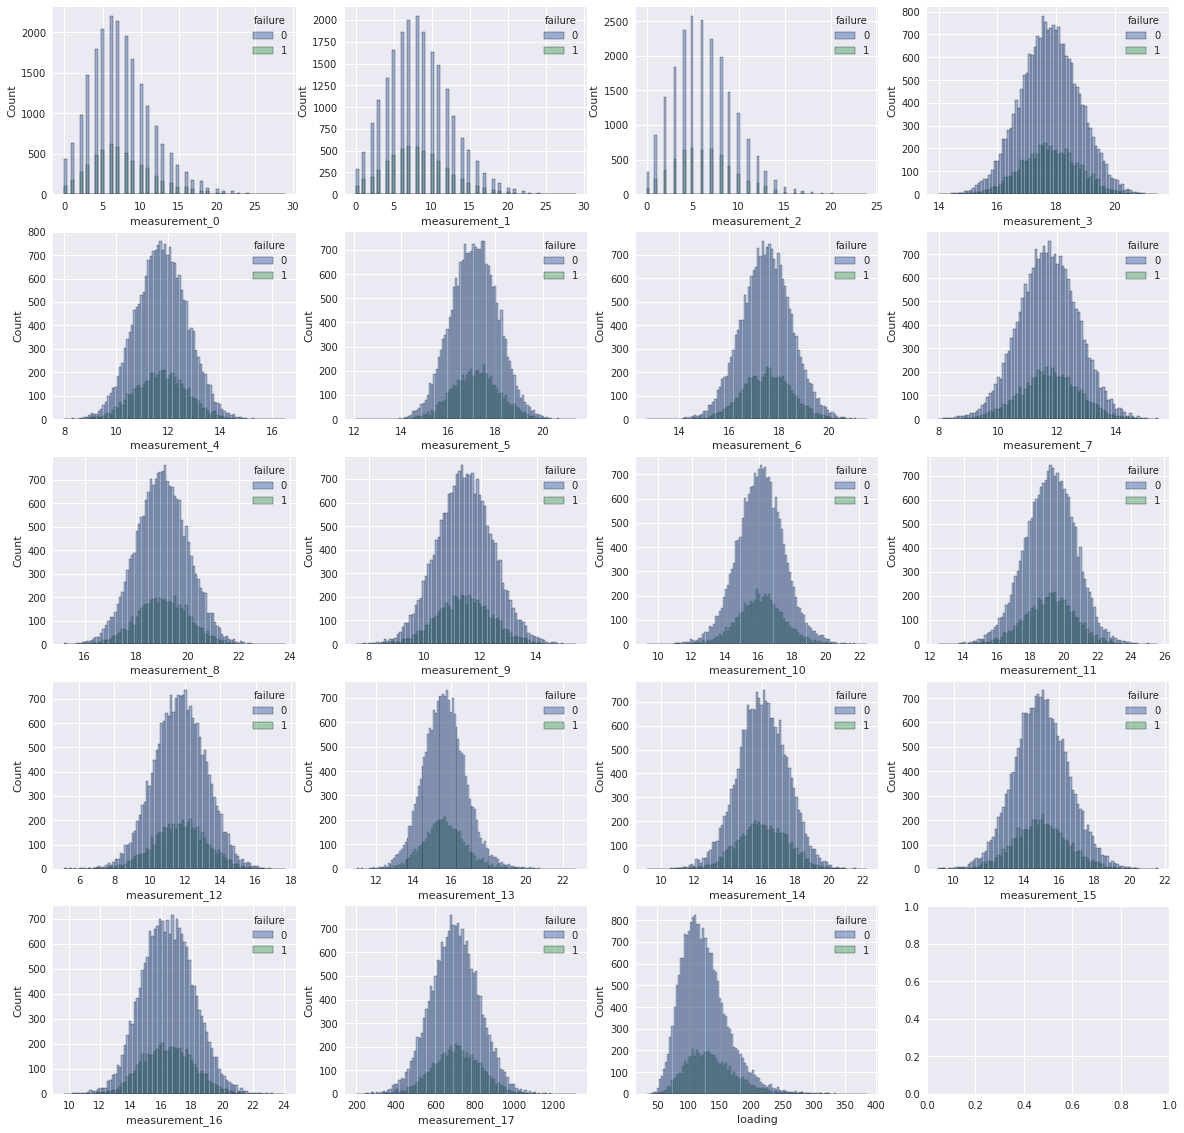

In [168]:
nrows, ncols = 5, 4
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
ax = ax.ravel()
for i, var in enumerate(cols_numeric):
    sns.histplot(data=df_train, x=var, hue='failure', ax=ax[i])
    ax[i].set_label(var)
ax = ax.reshape(nrows, ncols)
fig.show()

## split by product code

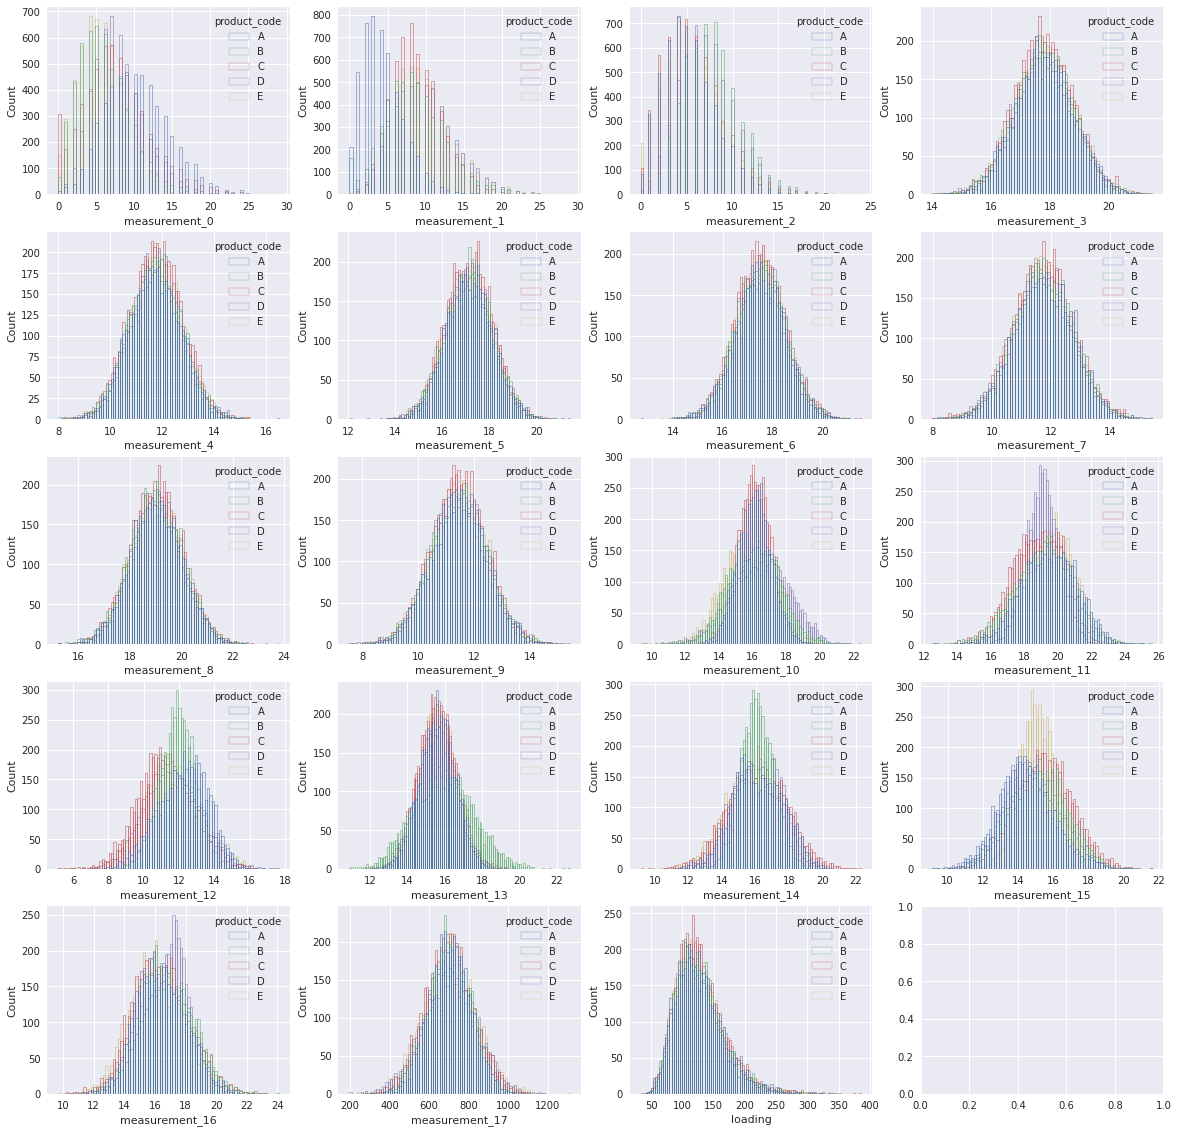

In [169]:
nrows, ncols = 5, 4
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
ax = ax.ravel()
for i, var in enumerate(cols_numeric):
    sns.histplot(data=df_train, x=var, hue='product_code', ax=ax[i], fill=False)
    ax[i].set_label(var)
ax = ax.reshape(nrows, ncols)
fig.show()

# boxplots

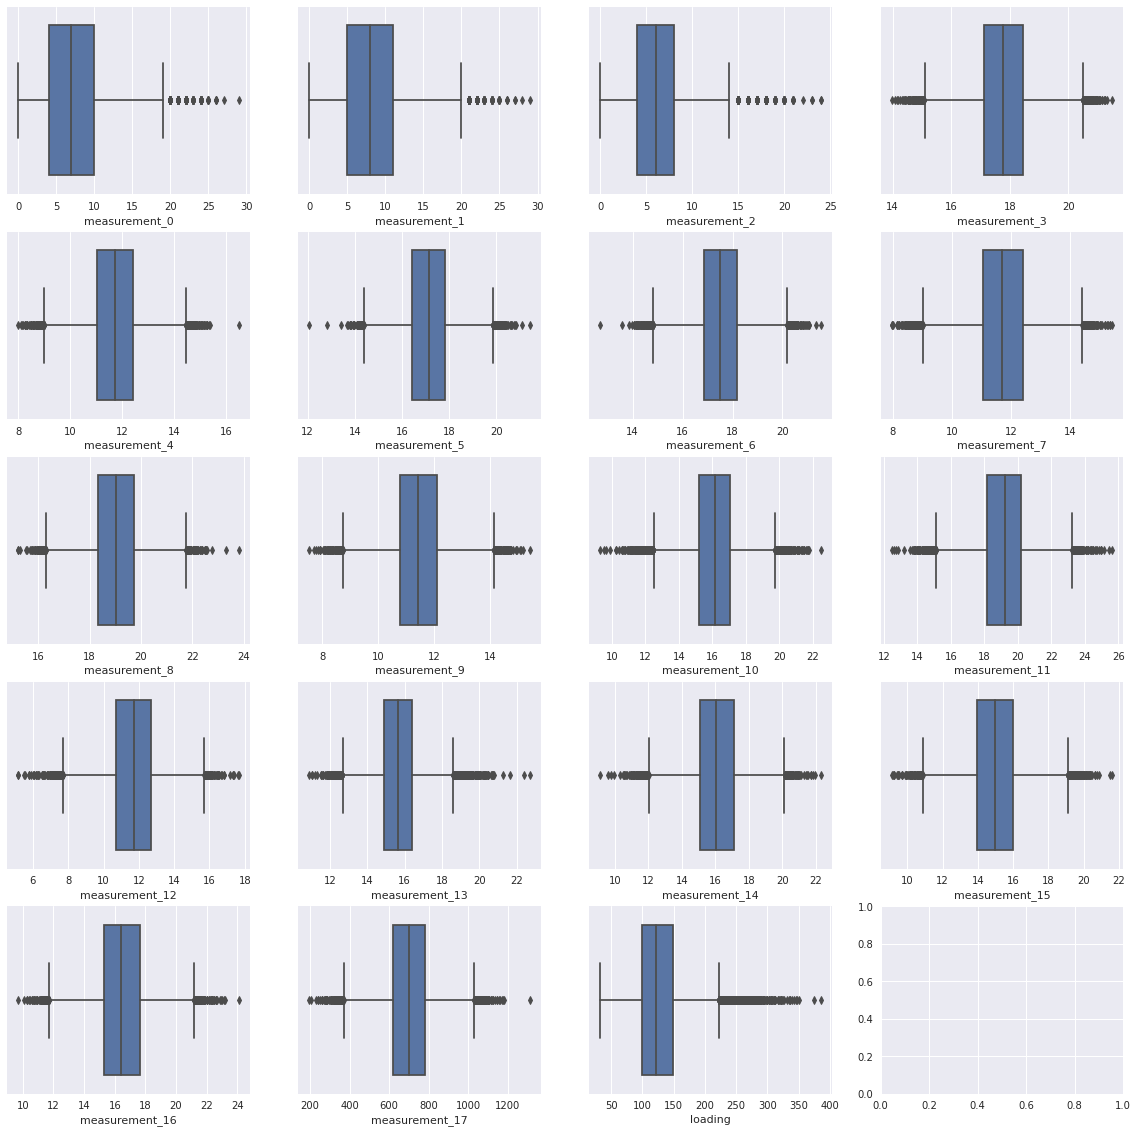

In [170]:
nrows, ncols = 5, 4
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
ax = ax.ravel()
for i, var in enumerate(cols_numeric):
    sns.boxplot(x=df_train[var], ax=ax[i])
ax = ax.reshape(nrows, ncols)
fig.show()

# Categorical variables

In [171]:
cat_cols = [
    'attribute_0',
    'attribute_1',
    'attribute_2',
    'attribute_3',
    #'product_code',
]
print(len(cat_cols))

4


## split by failure

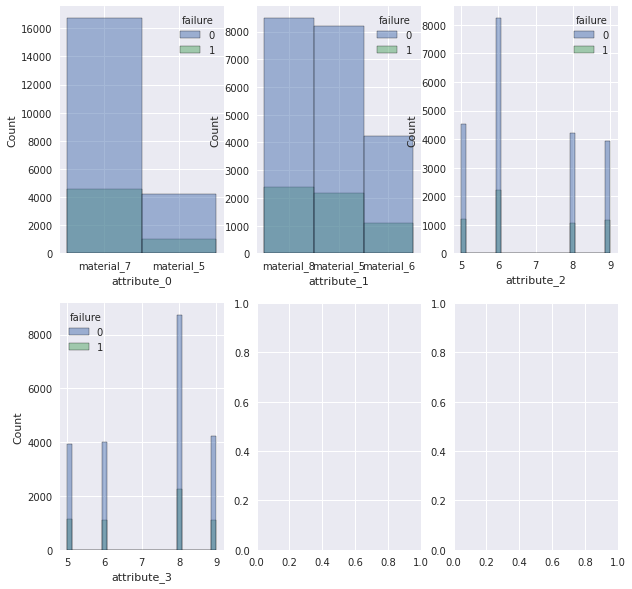

In [172]:
nrows, ncols = 2, 3
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
ax = ax.ravel()
for i, var in enumerate(cat_cols):
    sns.histplot(data=df_train, x=var, hue='failure', ax=ax[i])
    ax[i].set_label(var)
ax = ax.reshape(nrows, ncols)
fig.show()

## split by product code

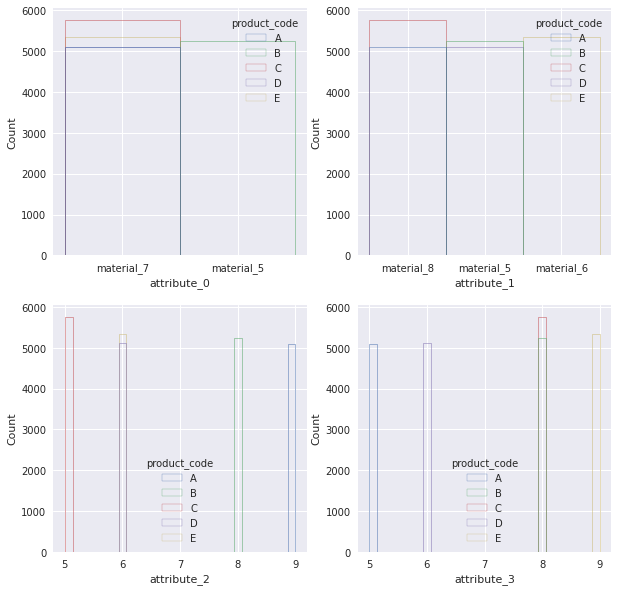

In [173]:
nrows, ncols = 2, 2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
ax = ax.ravel()
for i, var in enumerate(cat_cols):
    sns.histplot(data=df_train, x=var, hue='product_code', ax=ax[i], fill=False)
    ax[i].set_label(var)
ax = ax.reshape(nrows, ncols)
fig.show()

# Correlation matrix

<AxesSubplot:>

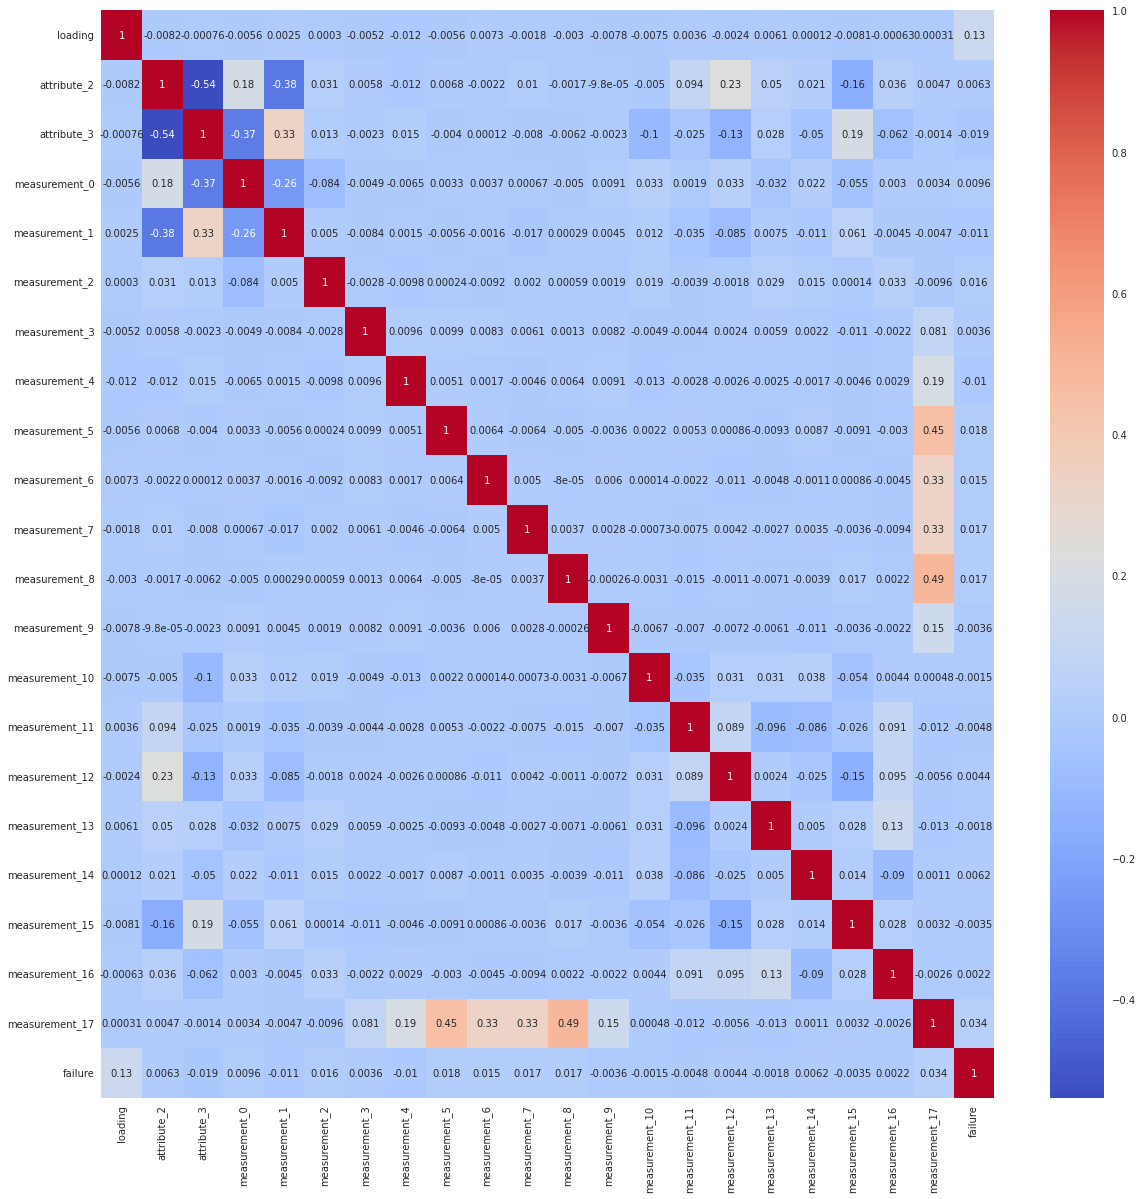

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(df_train.corr(), annot=True, ax=ax, cmap=sns.color_palette("coolwarm", as_cmap=True))

# Dealing with missing values
* For a baseline model, filling with mean seems a reasonable start
    * Distributions seem approximately Gaussian (to be checked)
* measurement_17 has "some" correlation with other variables, could be exploited during better imputation methods

# Class imbalance

In [175]:
df_train[df_train['failure'] == 0].shape[0] / df_train[df_train['failure'] == 1].shape[0]

3.703487342892547

# Baseline logistic regression model

In [176]:
X = df_train.drop(['failure', 'product_code'], axis='columns')
y = df_train['failure']

cat_cols = [v for v in X.columns if X[v].dtype in ['object', 'int' ]]
numerical_cols = [v for v in X.columns if v not in cat_cols]

print(cat_cols)
print(numerical_cols)

['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2']
['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']


In [189]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# impute missing values
imputer = Pipeline(
    [
        ('mean_imputer', SimpleImputer(add_indicator=False))
    ],
)

# OneHotEncode categorical features
category_transformer = Pipeline(
    [
        ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ],
)

# total preprocessing
preproc = ColumnTransformer(
    transformers = [
        ('imputer', imputer, numerical_cols),
        ('OneHotEncoder', category_transformer, cat_cols),
    ]
)

# FIXME class weight balanced?
# penalty = 'l2'
penalty = 'l1'
LR_model = LogisticRegression(class_weight=None, max_iter=10000, penalty=penalty, solver='liblinear')
# LR_model = LogisticRegression(class_weight='balanced', max_iter=10000, penalty=penalty, solver='liblinear')

# final model
pipe = Pipeline(
    [
        ('Preprocessing', preproc),
        ('Scaler', StandardScaler()),
        ('LogisticRegression', LR_model),
    ]
)

In [190]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.metrics import roc_auc_score

scoring = ['roc_auc']
scores = list()

# cv = StratifiedKFold(6, shuffle=True, random_state=42)
# cv_results = cross_validate(pipe, X, y, cv=cv, scoring=scoring)

groups = df_train['product_code']
cv = GroupKFold(len(groups.unique()))
cv_results = cross_validate(pipe, X, y, cv=cv, scoring=scoring, groups=groups)

In [191]:
print(cv_results['test_roc_auc'].mean(), cv_results['test_roc_auc'].std())

0.5794070870240595 0.005195779045318727


# Submission

In [180]:
pipe.fit(X, y)
pred = pipe.predict_proba(df_test)
pred

array([[0.52098845, 0.47901155],
       [0.54838083, 0.45161917],
       [0.56823362, 0.43176638],
       ...,
       [0.63541277, 0.36458723],
       [0.51844022, 0.48155978],
       [0.62988425, 0.37011575]])

In [181]:
submission = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv')
submission['failure'] = pred

In [182]:
submission.to_csv('submission.csv', index=False)